In [2]:
import numpy as np

def gen_random_conf(n):
    #input: n = length of array = width of array
    #output: random 10x10 array (-1/2's and +1/2's)
    
    A = np.random.choice([-0.5,0.5], size=(n,n))
    
    return(A)

In [25]:
#Compute energy as a function of J (i.e. assume J = 1)
# This is inefficient but I think easier to understand 
# Loop over all spins
def calculate_energy(N, spin):
        
    energy = 0
    #get_ising_plot(array = spin);
    
    for i in range(N):  # 0, N-1
      for j in range(N): # 0, N-1
        # calculate four interactions
        for delta_i in range(-1,2,2):  # -1 and 1
          ii = i + delta_i
          if (ii < 0): 
            ii = ii + N
          if (ii >=N): 
            ii = ii - N
          energy = energy - spin[i,j]*spin[ii, j] #spin--> array name
        
        for delta_j in range(-1,2,2):  # -1 and 1
          jj = j + delta_j
          if (jj < 0): 
            jj = jj + N
          if (jj >=N): 
            jj = jj - N
          energy = energy - spin[i,j]*spin[i, jj] 
        
        energy = energy * 0.5
    

    return energy

In [26]:
def magnetism_sum(spin):
    magnetism = np.sum(spin)
    
    return magnetism

In [27]:
#FIRST 2 CELLS ARE KAT'S WORK
import  numpy as np
import matplotlib.pyplot as plt

import matplotlib
print(matplotlib.__version__)

3.3.1


In [28]:
def get_ising_plot(array = [[1/2,-1/2],[-1/2,1/2]]):
    # input: an NxN array corresponding to spins in an Ising model
    # output: a visual representation of the array (matplotlib figure)

    # Verify input is a square numpy array
    ising_array = np.array(array)
    if ising_array.shape[0] != ising_array.shape[1]:
        print("Currently this code only supports square arrays, sorry!")
        return

    # Create the figure
    f = plt.figure()
    nx = range(ising_array.shape[0])
    ny = range(ising_array.shape[1])
    X, Y = np.meshgrid(nx,ny)
    plt.pcolormesh(X, Y, ising_array, cmap=plt.cm.Greys);

    # Format the figure
    frame = plt.gca()
    frame.set_aspect('equal')
    frame.axes.xaxis.set_visible(False)
    frame.axes.yaxis.set_visible(False)
    f.set_dpi(180)

    plt.show()

    return f




/apps/share64/debian7/anaconda/anaconda-6/lib/python3.7/site-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  app.launch_new_instance()


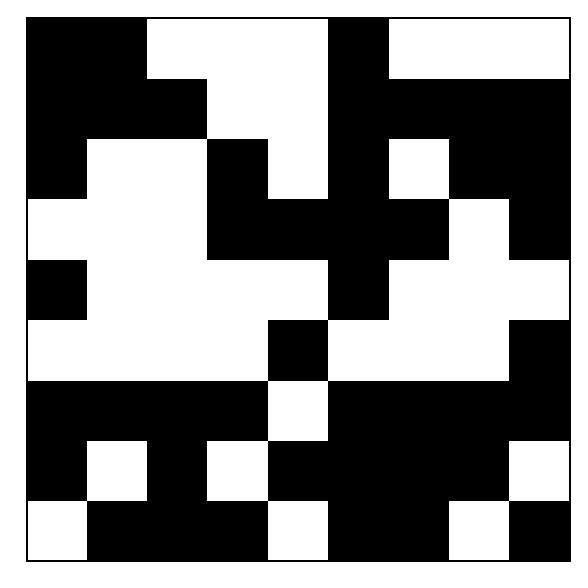

In [8]:
get_ising_plot(array = gen_random_conf(10));

/apps/share64/debian7/anaconda/anaconda-6/lib/python3.7/site-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  app.launch_new_instance()


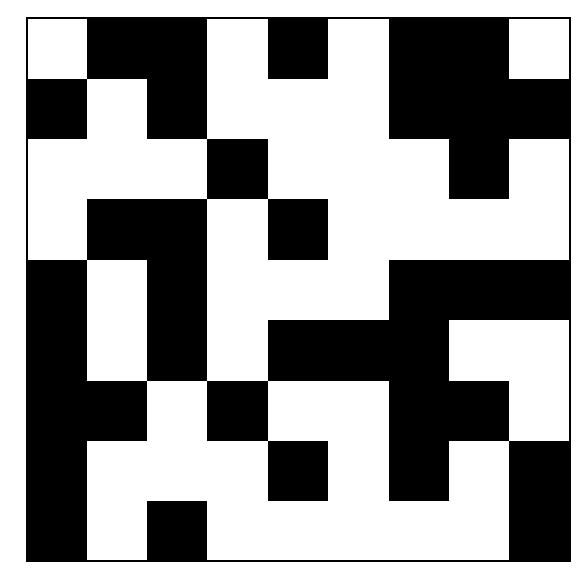

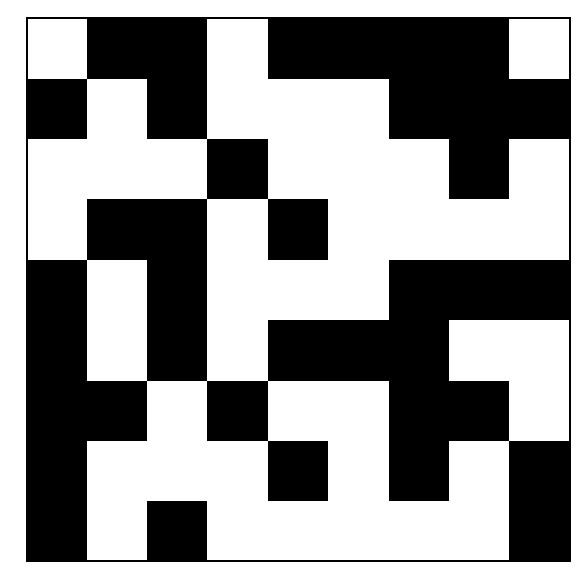

In [32]:
spin = gen_random_conf(10)
for i in range(1):
    metropolis(10,spin)

In [31]:
def metropolis(N, spin):
    k = 8.617E-5 #boltzman constant (eV/K)
    T = 300 #K
    
    
    original_energy = calculate_energy(10, spin)
    
    get_ising_plot(array = spin);
    
    new_energy = 0
    

    a = np.random.randint(0, N) 
    b = np.random.randint(0, N)
    random =  spin[a, b]

        #recalculate energy a
    for delta_a in range(-1,2,2):  # -1 and 1
        aa = a + delta_a
        if (a < 0): 
            aa = aa + N
        if (aa >=N): 
            aa = aa - N
        new_energy = new_energy - spin[a,b]*spin[aa, b] #spin--> array name

    for delta_b in range(-1,2,2):  # -1 and 1
        bb = b + delta_b
        if (bb < 0): 
            bb = bb + N
        if (bb >=N): 
            bb = bb - N
    new_energy = new_energy - spin[a,b]*spin[a, bb] 

    new_energy = new_energy * 0.5

    if new_energy < original_energy:
        original_energy = new_energy
        random *= -1
    #if new system has higher energy, spin accepted with given probability 
    #elif np.rand() < np.exp(-new_energy*k*T):
        #random *= -1
    spin[a, b] = random

    get_ising_plot(array = spin);

    return spin